In [1]:
import torch; print(torch.__version__)

1.6.0


In [2]:
import os; import sys;import warnings
cwd = os.getcwd()
path = os.path.join(cwd, '..', '..', 'movie_recommender')
if not path in sys.path:
    sys.path.append(path)
del cwd, path

In [3]:
warnings.filterwarnings("ignore")

In [4]:
from autoencoder import AutoEncoder

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import pickle

import multiprocessing

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [6]:
path = "../../"
with open(f'{path}tfidf_matrix.pkl', 'rb') as fh:
    tfidf = pickle.load(fh)

In [7]:
type(tfidf), tfidf.shape

(pandas.core.frame.DataFrame, (26744, 9697))

In [8]:
tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
ae = AutoEncoder(tfidf, validation_perc=0.1, lr=1e-3, intermediate_size=500, encoded_size=100)

In [10]:
ae.train_loop(epochs=30)

Epoch 1/30
train loss: 0.21269587 | validation loss: 0.21295443)
train loss: 0.19635575 | validation loss: 0.18430574)
train loss: 0.16947033 | validation loss: 0.17147605)
Epoch 2/30
train loss: 0.15679947 | validation loss: 0.14316389)
train loss: 0.12421668 | validation loss: 0.12371999)
train loss: 0.12509876 | validation loss: 0.1212894)
Epoch 3/30
train loss: 0.09484269 | validation loss: 0.09711894)
train loss: 0.08657245 | validation loss: 0.08695634)
train loss: 0.09232072 | validation loss: 0.0849117)
Epoch 4/30
train loss: 0.07797842 | validation loss: 0.07707795)
train loss: 0.06944113 | validation loss: 0.06825811)
train loss: 0.08249869 | validation loss: 0.06419612)
Epoch 5/30
train loss: 0.06294663 | validation loss: 0.06375276)
train loss: 0.07024623 | validation loss: 0.0572992)
train loss: 0.04659351 | validation loss: 0.05547686)
Epoch 6/30
train loss: 0.05693681 | validation loss: 0.05082547)
train loss: 0.05252377 | validation loss: 0.04841369)
train loss: 0.04073

In [14]:
losses = pd.DataFrame(data=list(zip(ae.train_losses, ae.val_losses)), columns=['train_loss', 'validation_loss'])
losses['epoch'] = (losses.index + 1) / 3

No handles with labels found to put in legend.


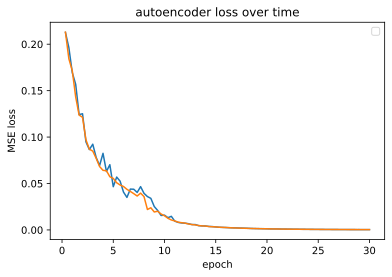

In [15]:
%config InlineBackend.figure_format = 'svg'
fig, ax = plt.subplots()
ax.plot(losses['epoch'], losses['train_loss'])
ax.plot(losses['epoch'], losses['validation_loss'])
ax.set_ylabel('MSE loss')
ax.set_xlabel('epoch')
ax.set_title('autoencoder loss over time')
ax.legend()

In [16]:
encoded = ae.get_encoded_representations()

In [17]:
encoded.shape

(26744, 100)

In [18]:
encoded[:10, :5]

array([[0.        , 0.        , 0.11402682, 0.        , 0.        ],
       [0.        , 0.        , 0.03807821, 0.        , 0.        ],
       [0.        , 0.        , 0.9696132 , 0.        , 0.        ],
       [0.        , 0.        , 0.31147358, 0.        , 0.        ],
       [0.        , 0.        , 0.23576686, 0.        , 0.        ],
       [0.        , 0.        , 0.12985949, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

In [19]:
with open('../../autoencoder_embeddings.pkl', 'wb') as fh:
    pickle.dump(encoded, fh)